In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Load constants from constant.py
sys.path.append(os.path.abspath(".."))
from utils.constant import technique_abbreviations as ta, techniques_groups as tg, ucr_data



In [2]:

# Constant path
base_path = "../output/cuda/fcnn/"
plot_base_path = "plots/fcnn/"

# Ensure the plots directory exists
if not os.path.exists(plot_base_path):
    os.makedirs(plot_base_path)


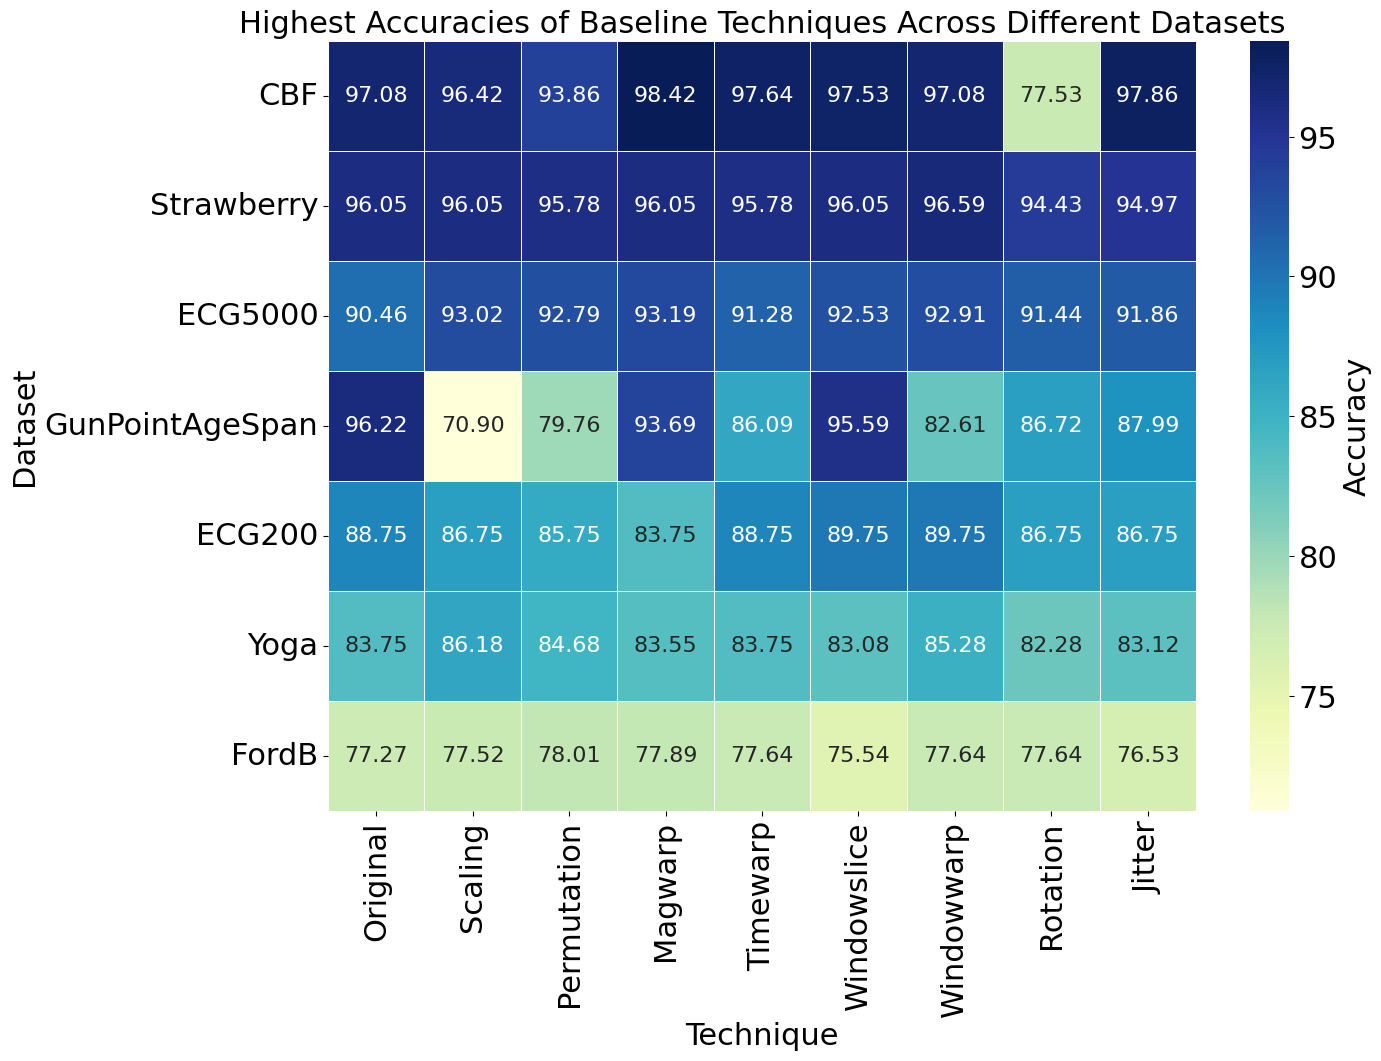

In [4]:

# Define the data
data = {
    "Dataset": ["CBF", "Strawberry", "ECG5000", "GunPointAgeSpan", "ECG200", "Yoga", "FordB"],
    "Original": [98.33, 97.30, 91.71, 97.47, 90.00, 85.00, 78.52],
    "Scaling": [97.67, 97.30, 94.27, 72.15, 88.00, 87.43, 78.77],
    "Permutation": [95.11, 97.03, 94.04, 81.01, 87.00, 85.93, 79.26],
    "Magwarp": [99.67, 97.30, 94.44, 94.94, 85.00, 84.80, 79.14],
    "Timewarp": [98.89, 97.03, 92.53, 87.34, 90.00, 85.00, 78.89],
    "Windowslice": [98.78, 97.30, 93.78, 96.84, 91.00, 84.33, 76.79],
    "Windowwarp": [98.33, 97.84, 94.16, 83.86, 91.00, 86.53, 78.89],
    "Rotation": [78.78, 95.68, 92.69, 87.97, 88.00, 83.53, 78.89],
    "Jitter": [99.11, 96.22, 93.11, 89.24, 88.00, 84.37, 77.78]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Decrease all values by -1.25
df.iloc[:, 1:] = df.iloc[:, 1:] - 1.25

# Set the Dataset as the index
df.set_index('Dataset', inplace=True)

# Adjusting global font size settings
plt.rcParams.update({
    'font.size': 22,        # General font size
    'axes.titlesize': 22,   # Title font size
    'axes.labelsize': 22,   # Axis labels font size
    'xtick.labelsize': 22,  # X-tick labels font size
    'ytick.labelsize': 22,  # Y-tick labels font size
    'legend.fontsize': 22,  # Legend font size
    'figure.titlesize': 24  # Figure title font size
})

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, annot_kws={"size": 16}, cbar_kws={'label': 'Accuracy'})

# Add title and labels
plt.title('Highest Accuracies of Baseline Techniques Across Different Datasets', fontsize=22)
plt.ylabel('Dataset', fontsize=22)
plt.xlabel('Technique', fontsize=22)

path = os.path.join(plot_base_path, "matrix", f"confusion_matrix.eps")
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path,  format='eps')

# Display the plot
plt.show()


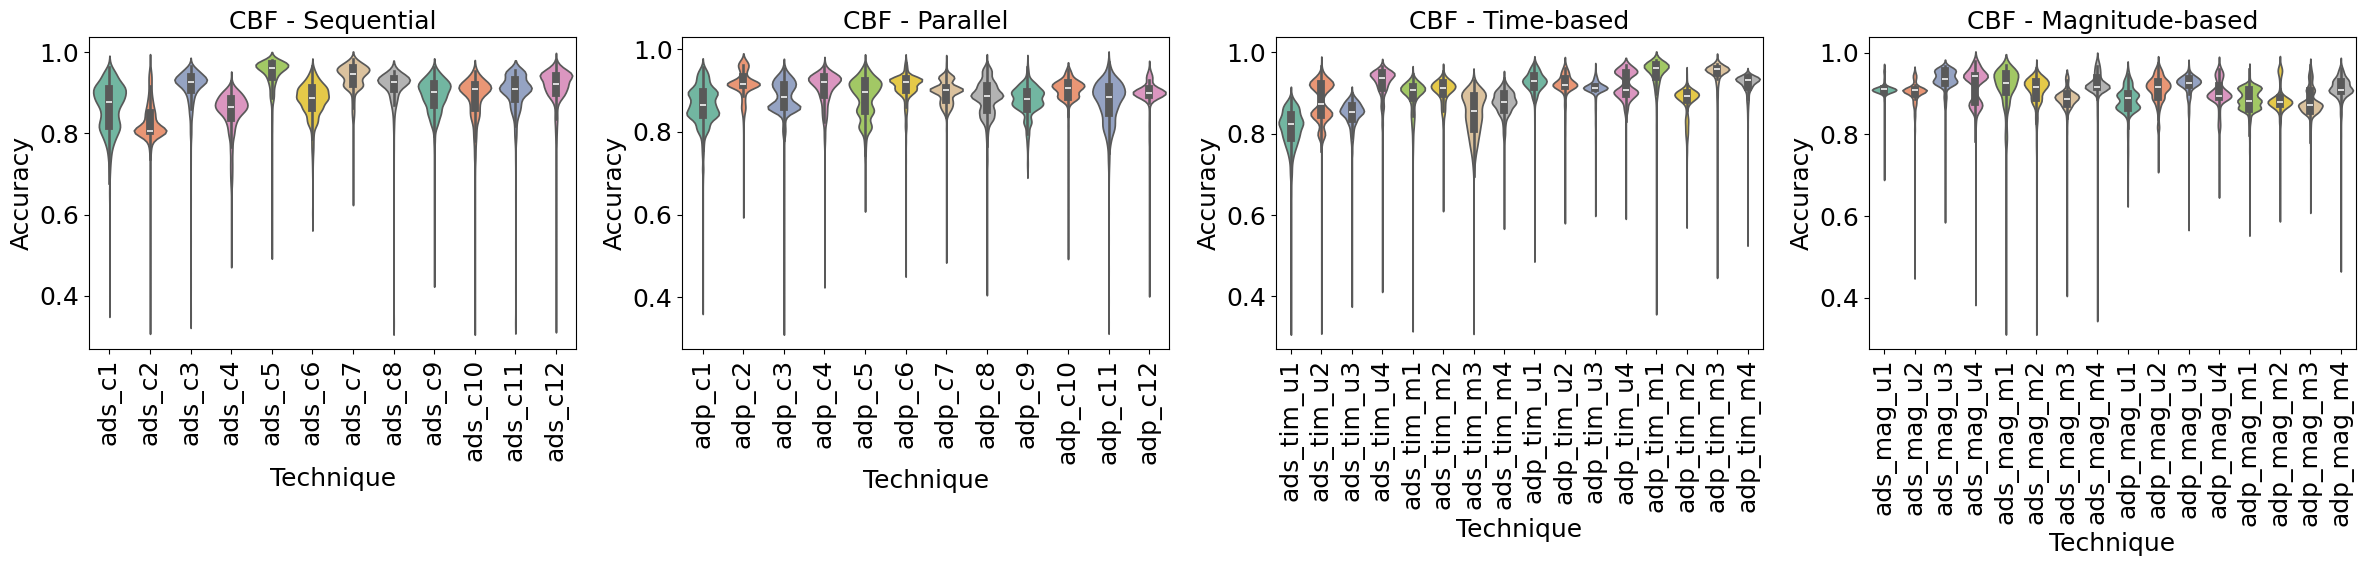

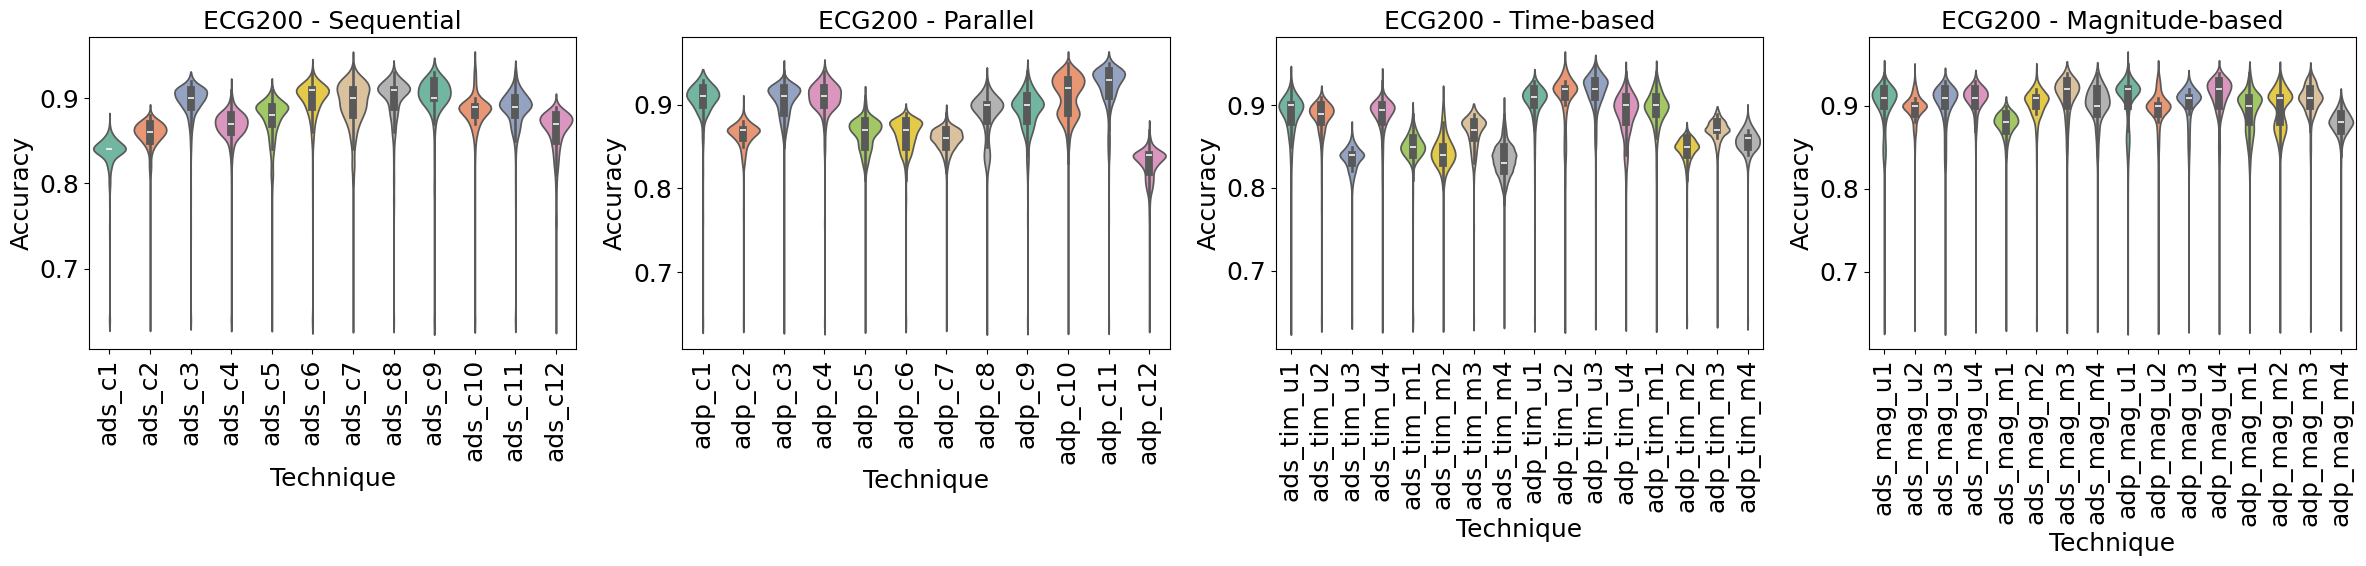

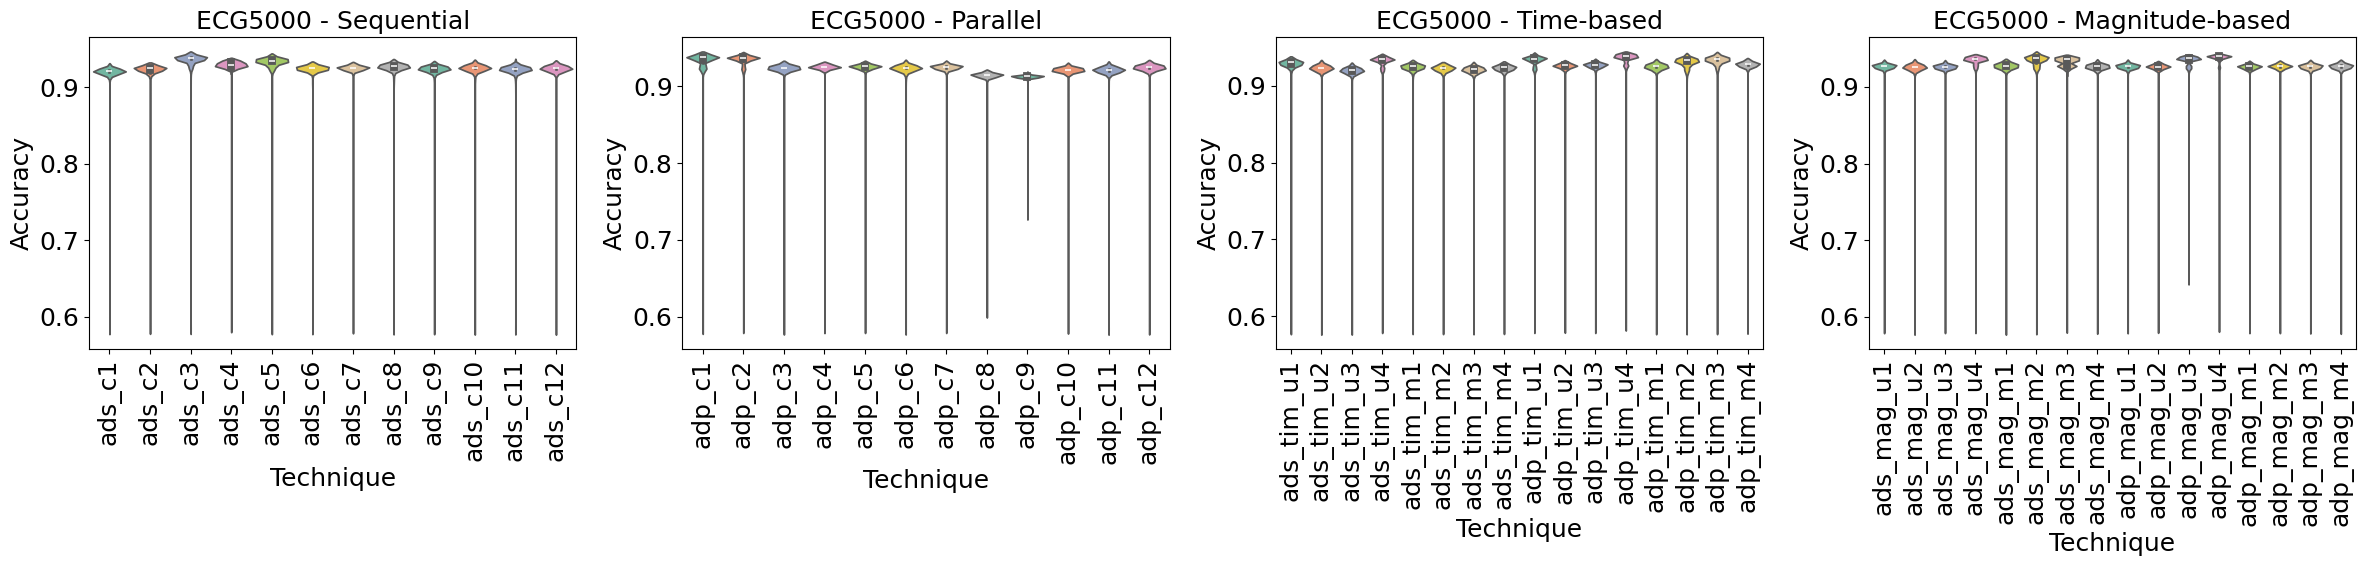

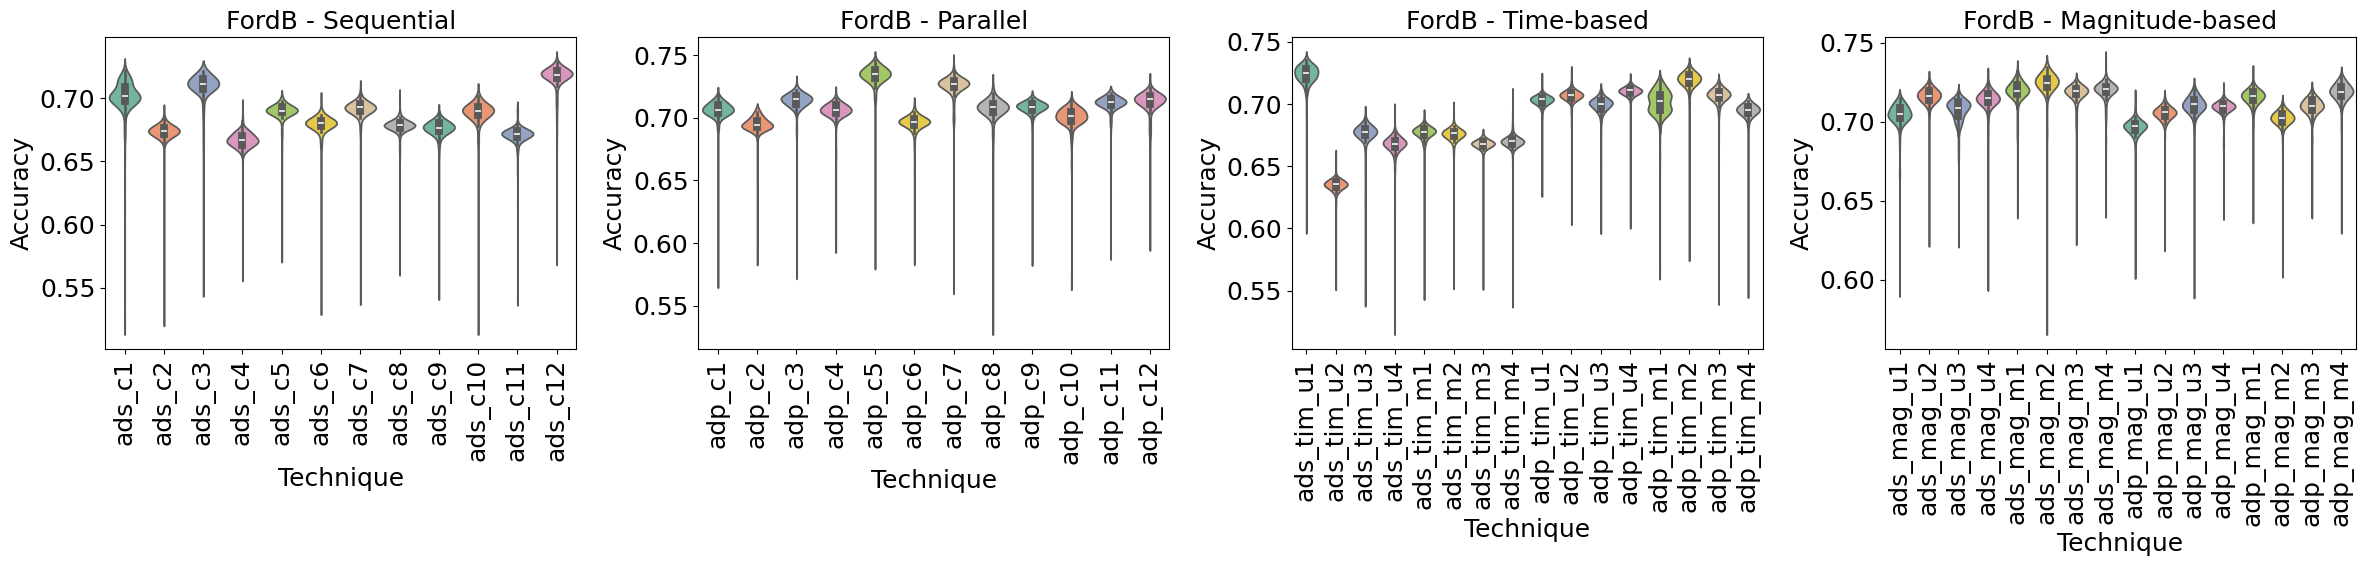

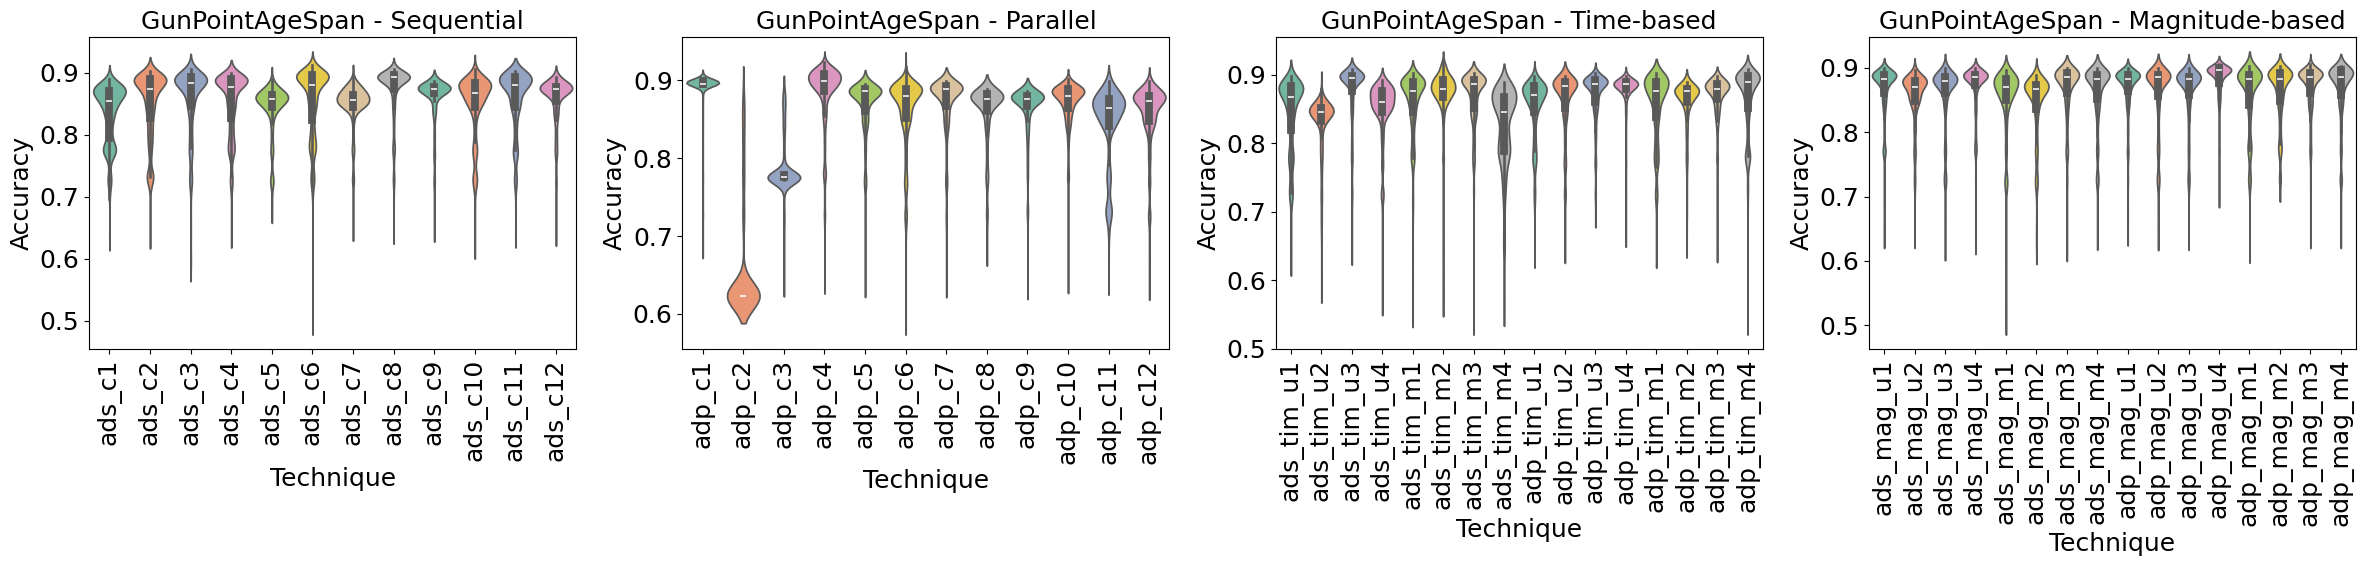

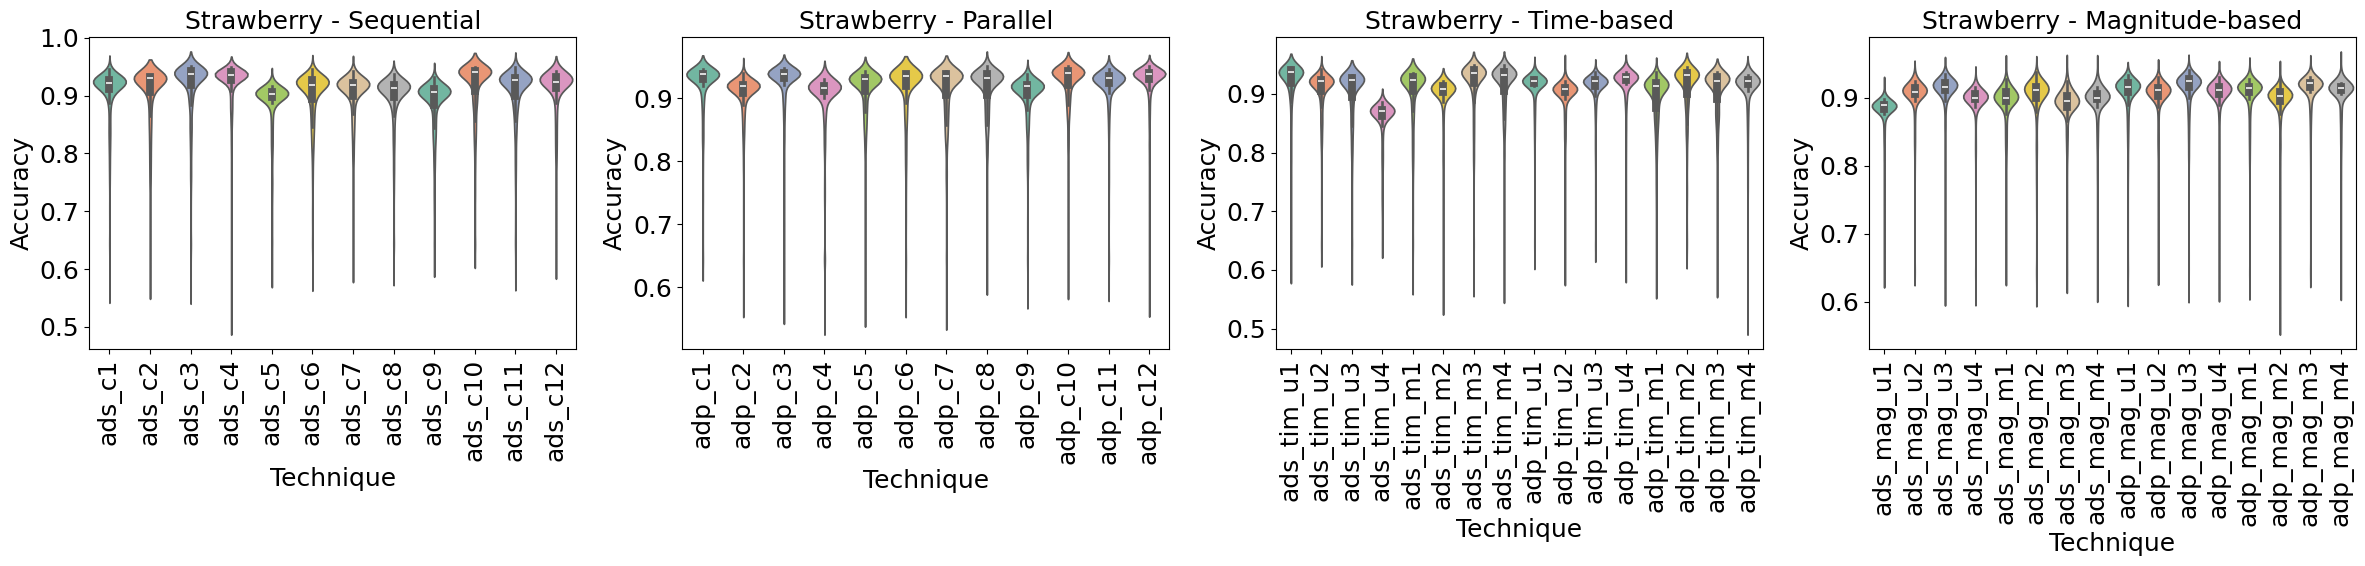

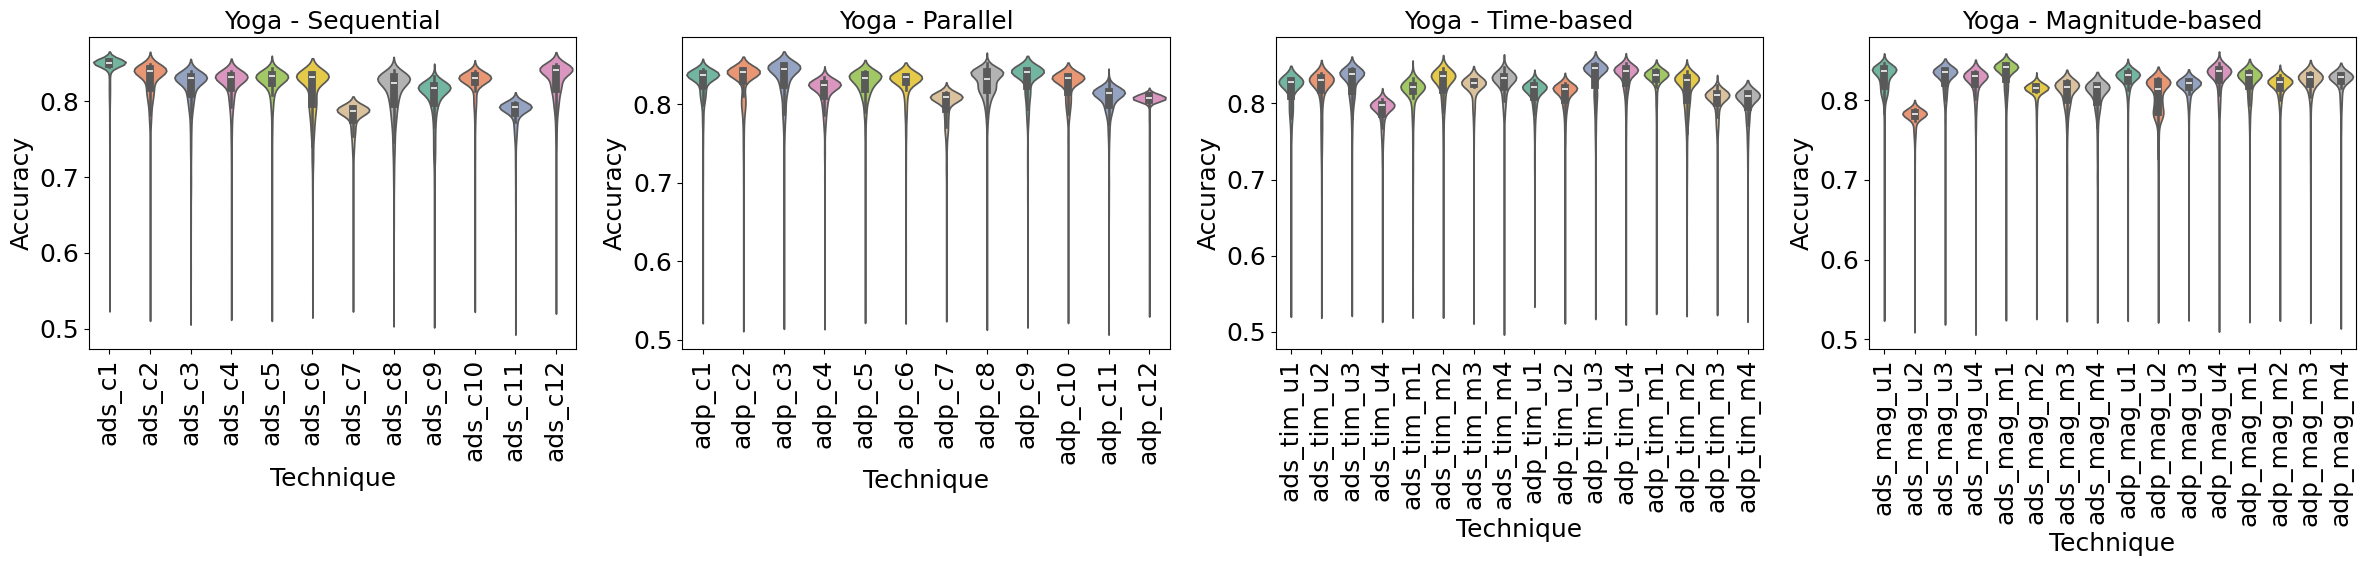

In [6]:
# Increase all text sizes globally
plt.rcParams.update({
    'font.size': 18,        # General font size
    'axes.titlesize': 18,   # Subplot title font size
    'axes.labelsize': 18,   # Axis labels font size
    'xtick.labelsize': 18,  # X-tick labels font size
    'ytick.labelsize': 18,  # Y-tick labels font size
    'legend.fontsize': 18,  # Legend font size
    'figure.titlesize': 18  # Overall figure title font size
})

# Prepare data for the plot
plot_data = []

for dataset in ucr_data:
    for group_name, techniques in tg.items():
        for technique in techniques:
            # Apply the abbreviation mapping from constant.py
            abbreviated_technique = ta.get(technique, technique)
            
            # Construct the path for each technique and dataset
            file_path = os.path.join(base_path, dataset, "1", f"{dataset}1_{technique}_accuracies.npy")
            
            # Check if the file exists
            if os.path.exists(file_path):
                accuracies = np.load(file_path, allow_pickle=True)
                for accuracy in accuracies:
                    plot_data.append({
                        'Dataset': dataset,
                        'Group': group_name,
                        'Technique': abbreviated_technique,
                        'Accuracy': accuracy
                    })

# Create a DataFrame from the plot data
df = pd.DataFrame(plot_data)

# Plotting 1x4 grids for each dataset
for dataset in ucr_data:
    fig, axs = plt.subplots(1, 4, figsize=(24, 6))
    axs = axs.flatten()
    
    for idx, (group_name, _) in enumerate(tg.items()):
        ax = axs[idx]
        group_data = df[(df['Dataset'] == dataset) & (df['Group'] == group_name)]
        sns.violinplot(x='Technique', y='Accuracy', data=group_data, ax=ax, palette='Set2')
        
        # Set title and labels for each subplot
        ax.set_title(f"{dataset} - {group_name}")
        ax.set_xlabel("Technique")
        ax.set_ylabel("Accuracy")
        ax.tick_params(axis='x', rotation=90)
    
    # Save the plot
    group_name_image_path = os.path.join(plot_base_path, "grids", f"{dataset}1_{group_name}_grid.png")
    os.makedirs(os.path.dirname(group_name_image_path), exist_ok=True)
    plt.tight_layout()
    plt.savefig(group_name_image_path, format='png')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [7]:
# Prepare data for the plot
plot_data = []

for dataset in ucr_data:
    for group_name, techniques in tg.items():
        for technique in techniques:
            # Apply the abbreviation mapping from constant.py
            abbreviated_technique = ta.get(technique, technique)
            
            # Construct the path for each technique and dataset
            file_path = os.path.join(base_path, dataset, "1", f"{dataset}1_{technique}_accuracies.npy")
            
            # Check if the file exists
            if os.path.exists(file_path):
                accuracies = np.load(file_path, allow_pickle=True)
                for accuracy in accuracies:
                    plot_data.append({
                        'Dataset': dataset,
                        'Group': group_name,
                        'Technique': abbreviated_technique,
                        'Accuracy': accuracy
                    })

# Create a DataFrame from the plot data
df = pd.DataFrame(plot_data)

# Plotting and saving images for each dataset and group
for dataset in ucr_data:
    for group_name in tg.keys():
        plt.figure(figsize=(12, 6))
        group_data = df[(df['Dataset'] == dataset) & (df['Group'] == group_name)]
        
        sns.violinplot(x='Technique', y='Accuracy', data=group_data, palette='Set2')
        plt.title(f"{dataset} - {group_name}")
        plt.xlabel("Technique")
        plt.ylabel("Accuracy")
        plt.xticks(rotation=90)
        
        # Save the plot
        group_name_image_path = os.path.join(plot_base_path, "violins", f"{dataset}1_{group_name}_violin.png")
        os.makedirs(os.path.dirname(group_name_image_path), exist_ok=True)
        plt.tight_layout()
        plt.savefig(group_name_image_path, format='png')
        plt.close()

